In [138]:
%cd /content/drive/MyDrive/EdgeNeuralAi

/content/drive/MyDrive/EdgeNeuralAi


In [139]:
%matplotlib inline

In [140]:
# importing neccessary library
import time , math
import os, cv2 , glob , shutil
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet # importing xml.etree for reading the xml files

import torch
# importing tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [141]:
df_test = pd.read_csv('./testSet.csv')

In [142]:
df_test

,Unnamed: 0,filepath,center_x,center_y,bb_width,bb_height
0,51,./VOC2007/Annotations/car_511.xml,0.561250,0.530000,0.142500,0.066667
1,299,./VOC2007/Annotations/car_183.xml,0.526000,0.809593,0.380000,0.107558
2,191,./VOC2007/Annotations/car_599.xml,0.376250,0.583333,0.057500,0.026667
3,115,./VOC2007/Annotations/car_661.xml,0.490000,0.461111,0.556667,0.153333
4,625,./VOC2007/Annotations/car_330.xml,0.892500,0.505976,0.050000,0.039841
5,76,./VOC2007/Annotations/car_448.xml,0.518750,0.506780,0.897500,0.579661
6,146,./VOC2007/Annotations/car_411.xml,0.735000,0.726667,0.060000,0.040000
7,349,./VOC2007/Annotations/car_143.xml,0.543388,0.524123,0.355372,0.153509
8,428,./VOC2007/Annotations/car_379.xml,0.562500,0.676768,0.240000,0.101010
9,27,./VOC2007/Annotations/car_665.xml,0.500000,0.633333,0.290000,0.128889


In [143]:
! pip install -r ./yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
yolo_path = './yolov5/runs/train/'
latest_run = 'exp'

# Fetching the best weights 
best_weights = os.path.join(yolo_path, latest_run, 'weights', 'best.pt')

# Loading the model with best weights trained on custom data 
model = torch.hub.load('ultralytics/yolov5', 'custom', best_weights)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
INFO:yolov5:requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
INFO:yolov5:Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

INFO:yolov5:requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

INFO:yolov5:YOLOv5 🚀 2022-8-8 Python-3.7.13 torch-1.12.0+cu113 CPU

YOLOv5 🚀 2022-8-8 Python-3.7.13 torch-1.12.0+cu113 CPU

INFO:yolov5:Fusing layers...

In [145]:
images = []
Results = []

In [146]:
len(Results)

0

In [147]:

for img in glob.glob('./test/*.jpg'):
  images.append(plt.imread(img))



In [148]:
st = time.time()
for i in range(len(images)):
  res = model(images[i])
  Results.append(np.squeeze(res.render()))
ed = time.time()

In [149]:
print("Time of execution is {0} sec".format(ed-st))

Time of execution is 12.032950401306152 sec


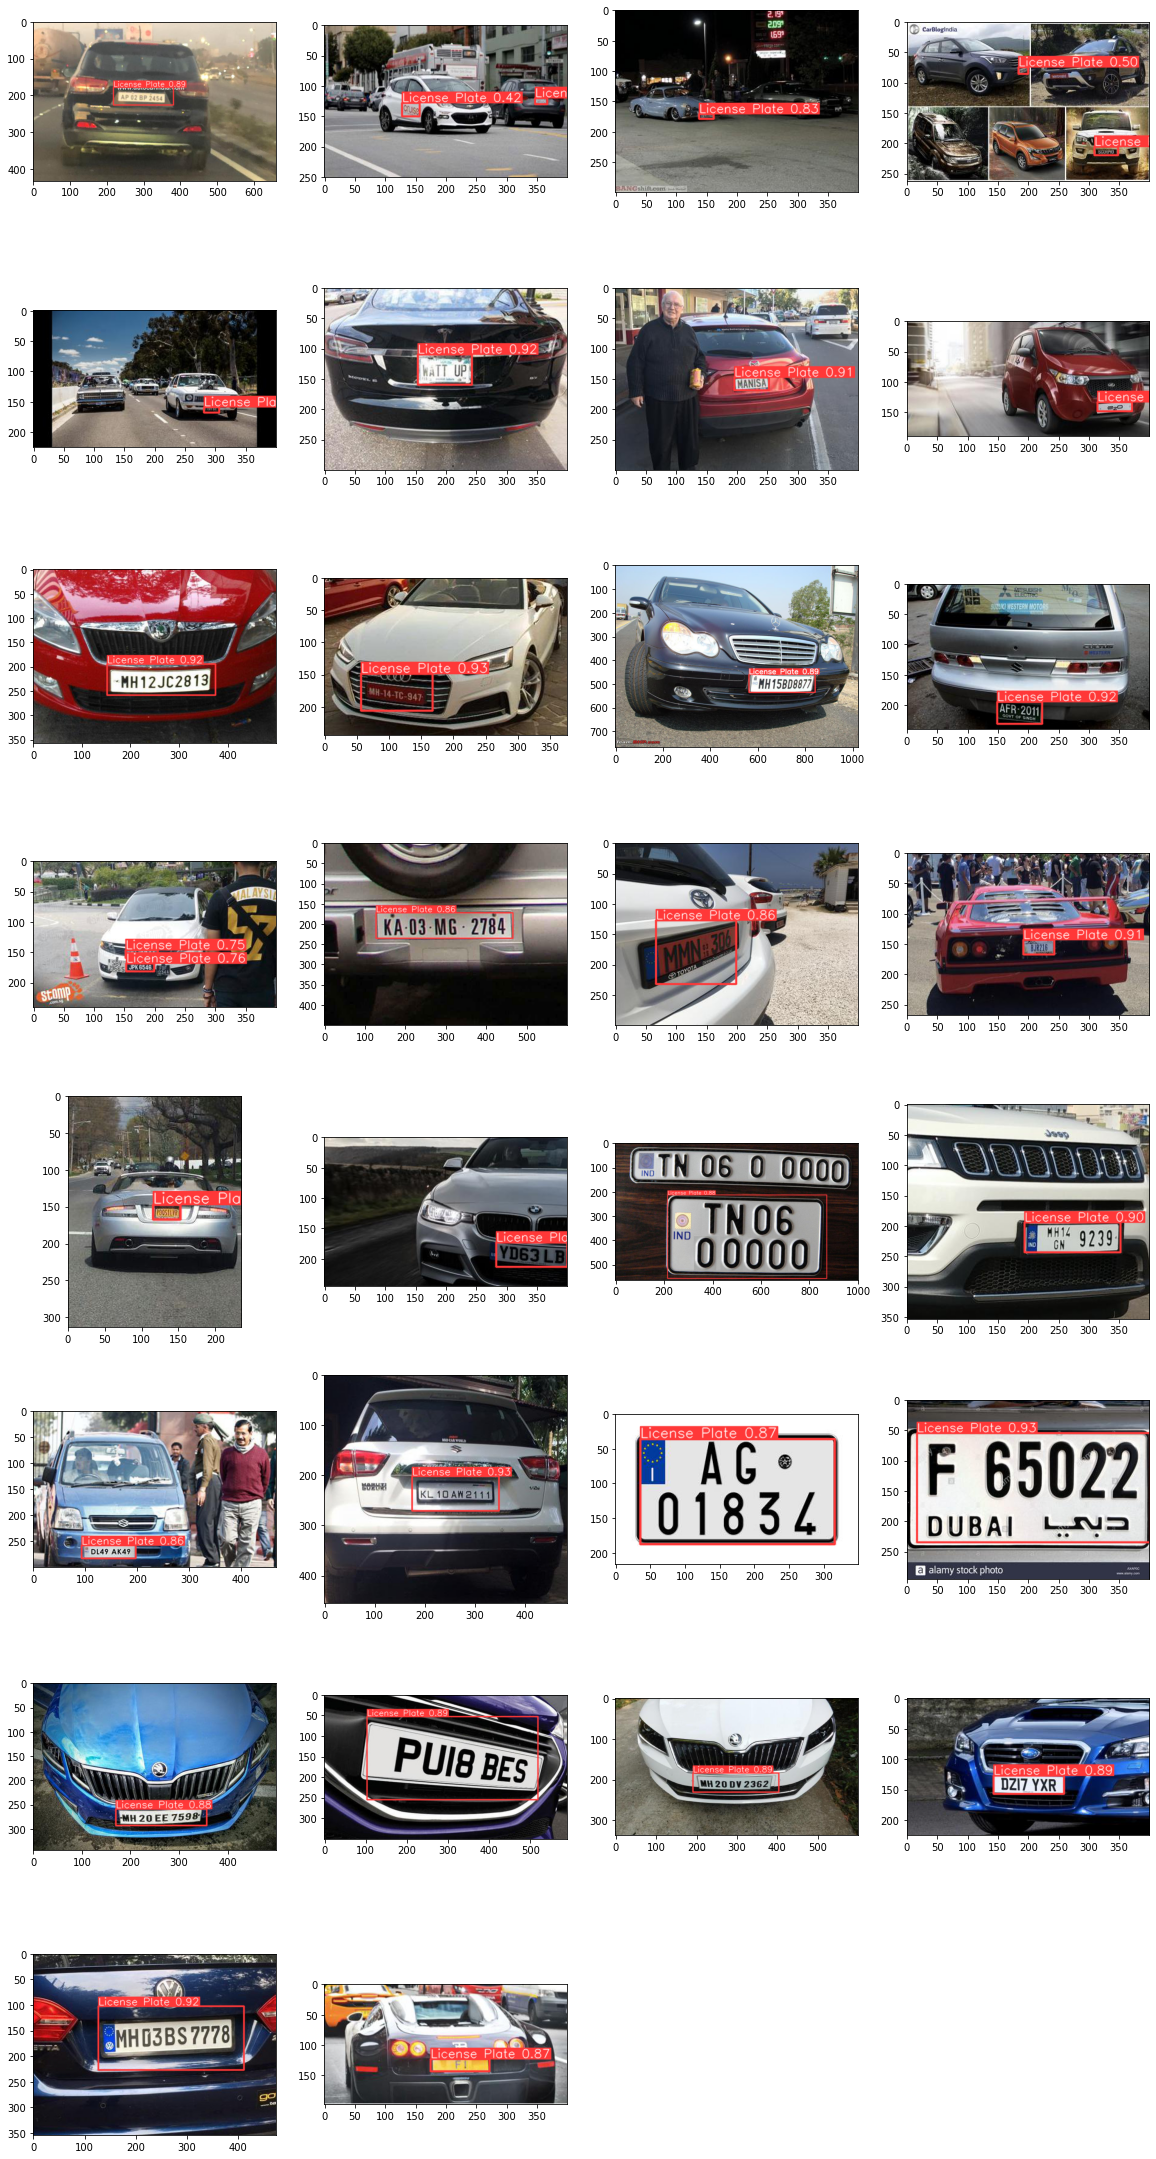

In [150]:
plt.figure(figsize = (20,40))
for i in range(len(Results)):
  plt.subplot(math.ceil(len(Results)/4),4,i+1)
  plt.imshow((Results[i]))

In [131]:
xmin , ymin , xmax , ymax   = res.pandas().xyxy[0].iloc[0][['xmin','xmax','ymin','ymax']]

In [132]:
xmin = int(xmin)
xmax = int(xmax)
ymin = int(ymin)
ymax = int(ymax)
